<a href="https://colab.research.google.com/github/swilsonmfc/pandas/blob/main/6_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hotel Bookings

![](https://cdn.inprnt.com/thumbs/5b/fa/5bfa6a8ea6c461d1c21c0a44962968ed.jpg?response-cache-control=max-age=2628000)

# Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data
* https://www.kaggle.com/jessemostipak/hotel-booking-demand

In [ ]:
!wget -O hotel.zip https://github.com/swilsonmfc/pandas/blob/main/hotel.zip?raw=true

--2021-07-08 20:02:46--  https://github.com/swilsonmfc/pandas/blob/main/hotel.zip?raw=true
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/swilsonmfc/pandas/raw/main/hotel.zip [following]
--2021-07-08 20:02:46--  https://github.com/swilsonmfc/pandas/raw/main/hotel.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/swilsonmfc/pandas/main/hotel.zip [following]
--2021-07-08 20:02:47--  https://raw.githubusercontent.com/swilsonmfc/pandas/main/hotel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1308365 (1.2M) [applic

In [ ]:
!unzip hotel.zip

Archive:  hotel.zip
replace hotel_bookings.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: hotel_bookings.csv      


In [ ]:
df = pd.read_csv('./hotel_bookings.csv')

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


# Task
* Perform EDA while cleaning the dataset of:
  * Data Types & Formats
  * Outliers
  * Missing Data
  * Entry Problems

# EDA

## Hotel

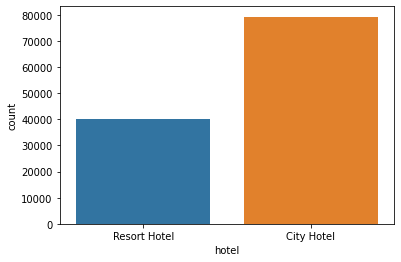

In [ ]:
sns.countplot(x=df.hotel);

In [ ]:
print(f'Number of countries {len(df.country.unique())}')
df.groupby('country').size().sort_values(ascending=False).head(10)

Number of countries 178


country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
dtype: int64

## Cancelled

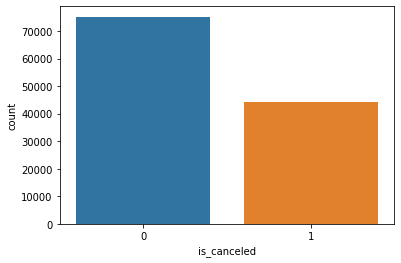

In [ ]:
sns.countplot(x=df.is_canceled)

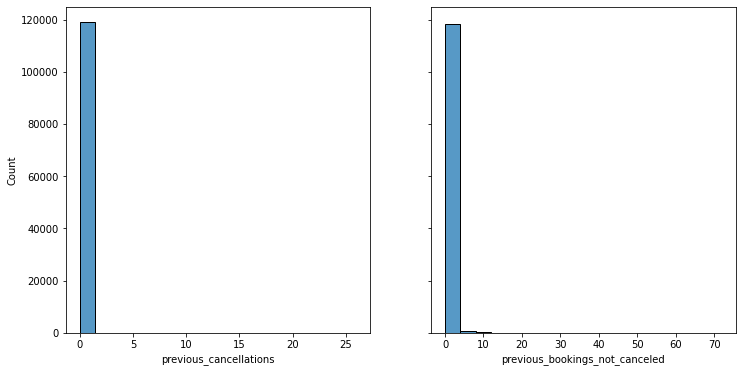

In [ ]:
fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(12,6))
sns.histplot(x=df.previous_cancellations, ax=ax[0])
sns.histplot(x=df.previous_bookings_not_canceled, ax=ax[1]);

## Lead Time

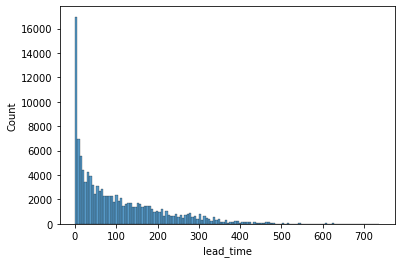

In [ ]:
sns.histplot(x=df.lead_time);

## Arrival Dates

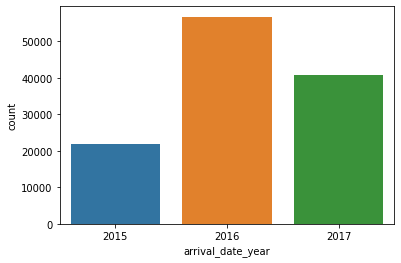

In [ ]:
sns.countplot(x=df.arrival_date_year)

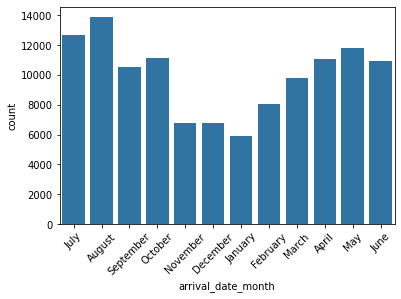

In [ ]:
sns.countplot(x=df.arrival_date_month, color='#1f77b4')
plt.xticks(rotation=45);

## Stays

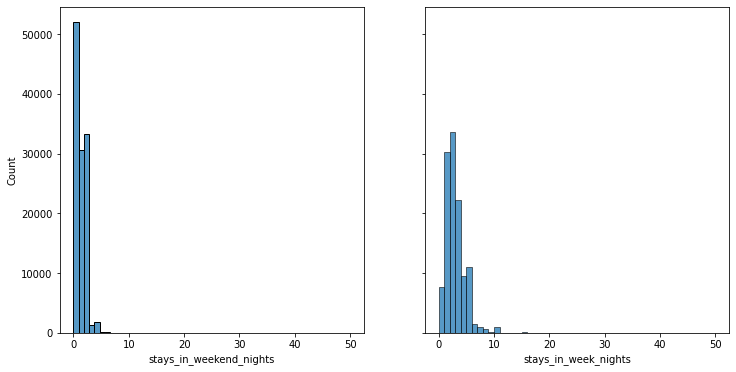

In [ ]:
fig, ax = plt.subplots(ncols=2, sharey=True, sharex=True, figsize=(12, 6))
sns.histplot(x=df.stays_in_weekend_nights, bins=20, ax=ax[0])
sns.histplot(x=df.stays_in_week_nights, bins=50, ax=ax[1]);

## People

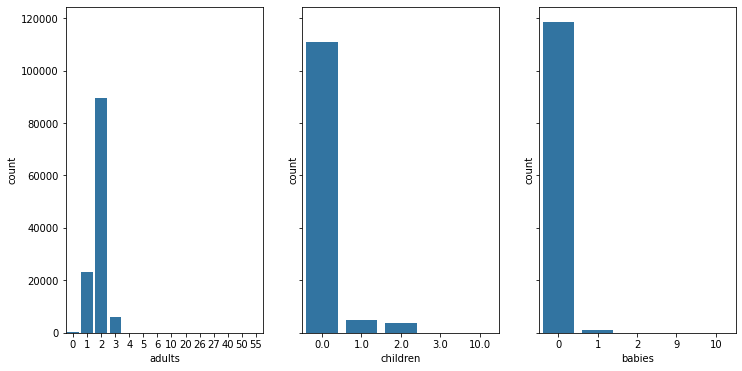

In [ ]:
fig, ax = plt.subplots(ncols=3, sharey=True, figsize=(12, 6))
sns.countplot(x=df.adults,   ax=ax[0], color='#1f77b4')
sns.countplot(x=df.children, ax=ax[1], color='#1f77b4');
sns.countplot(x=df.babies,   ax=ax[2], color='#1f77b4');

In [ ]:
# Holding rooms for lots of adults?
df[df.adults > 10]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1539,Resort Hotel,1,304,2015,September,36,3,0,3,40,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
1587,Resort Hotel,1,333,2015,September,36,5,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,96.0,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
1643,Resort Hotel,1,336,2015,September,37,7,1,2,50,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Group,0.0,0,0,Canceled,2015-01-18
1752,Resort Hotel,1,340,2015,September,37,12,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,96.0,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
1884,Resort Hotel,1,347,2015,September,38,19,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,96.0,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
1917,Resort Hotel,1,349,2015,September,39,21,1,3,27,0.0,0,HB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
1962,Resort Hotel,1,352,2015,September,39,24,1,3,27,0.0,0,HB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
2003,Resort Hotel,1,354,2015,September,39,26,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,96.0,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
2164,Resort Hotel,1,361,2015,October,40,3,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,96.0,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
2173,Resort Hotel,1,338,2015,October,41,4,2,0,55,0.0,0,HB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Group,0.0,0,0,Canceled,2015-01-02


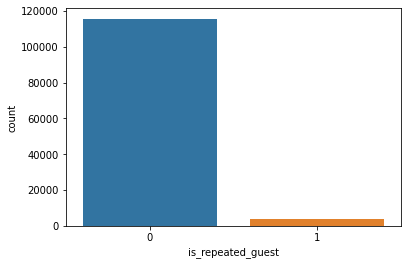

In [ ]:
sns.countplot(x=df.is_repeated_guest);

## Customer Type

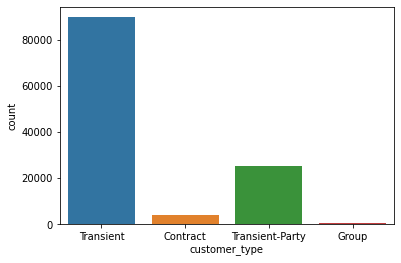

In [ ]:
sns.countplot(x=df.customer_type)

## Agent & Company

In [ ]:
print(f'No Company  {df.company.isna().sum():,}')
print(f'Has Company {df.company.notna().sum():,}')
print(f'Unique      {len(df.company.unique())}')

No Company  112,593
Has Company 6,797
Unique      353


In [ ]:
print(f'No Agent  {df.agent.isna().sum():,}')
print(f'Has Agent {df.agent.notna().sum():,}')
print(f'Unique    {len(df.agent.unique())}')

No Agent  16,340
Has Agent 103,050
Unique    334


## Booking

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

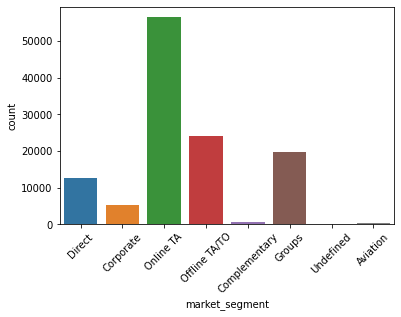

In [ ]:
sns.countplot(x=df.market_segment)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

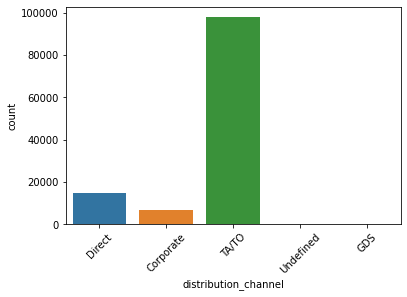

In [ ]:
sns.countplot(x=df.distribution_channel)
plt.xticks(rotation=45)

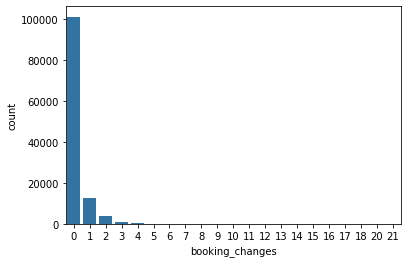

In [ ]:
sns.countplot(x=df.booking_changes, color='#1f77b4');

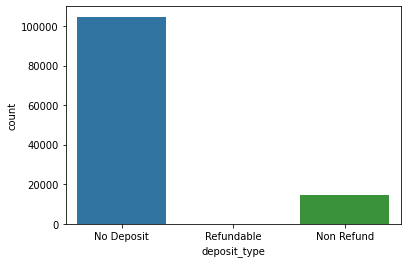

In [ ]:
sns.countplot(x=df.deposit_type);

## Rooms

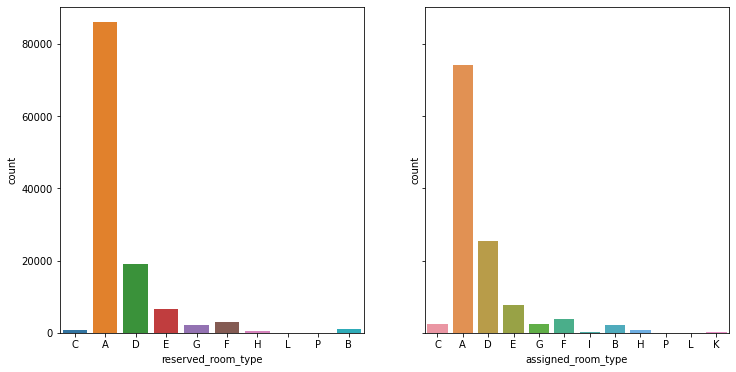

In [ ]:
fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(12,6))
sns.countplot(x=df.reserved_room_type, ax=ax[0])
sns.countplot(x=df.assigned_room_type, ax=ax[1])

In [ ]:
correct = np.where(df.reserved_room_type == df.assigned_room_type, 1, 0)
print(f'Percent Correct {correct.sum() * 100. / len(correct):.2f}%')

Percent Correct 87.51%


## Requests

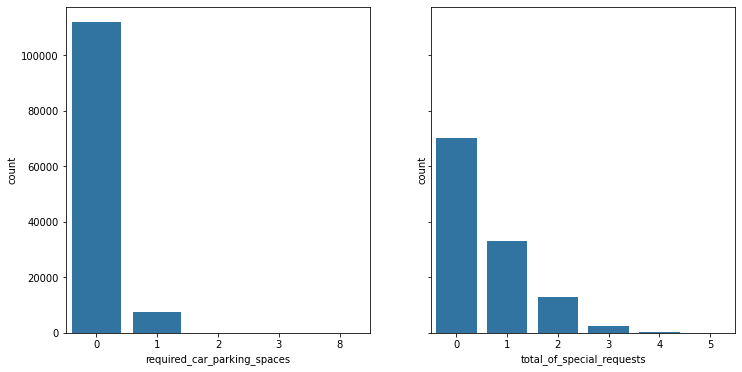

In [ ]:
fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(12,6))
sns.countplot(x=df.required_car_parking_spaces, color='#1f77b4', ax=ax[0])
sns.countplot(x=df.total_of_special_requests, color='#1f77b4', ax=ax[1]);

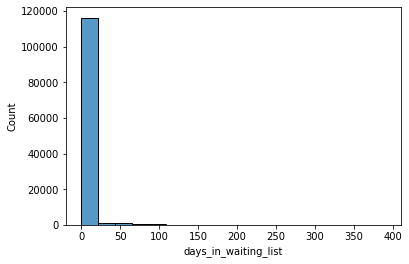

In [ ]:
sns.histplot(x=df.days_in_waiting_list);

## Average Daily Rate

In [ ]:
df.adr.describe()

count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

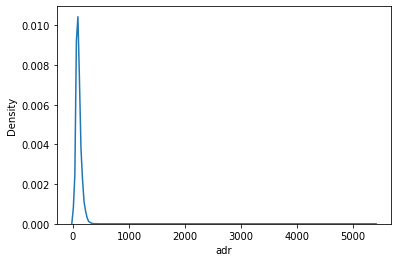

In [ ]:
sns.kdeplot(df.adr);

In [ ]:
df[(df.adr > 1000) | (df.adr < 10)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
125,Resort Hotel,0,32,2015,July,27,4,0,1,4,0.0,0,FB,PRT,Complementary,Direct,0,0,0,H,H,2,No Deposit,NaN,NaN,0,Transient,0.0,0,1,Check-Out,2015-07-05
167,Resort Hotel,0,111,2015,July,28,6,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,H,0,No Deposit,240.0,NaN,0,Transient,0.0,0,2,Check-Out,2015-07-06
168,Resort Hotel,0,0,2015,July,28,6,0,0,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,H,0,No Deposit,250.0,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118631,City Hotel,0,78,2017,August,34,23,0,0,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,K,7,No Deposit,98.0,NaN,0,Transient-Party,0.0,0,0,Check-Out,2017-08-23
118762,City Hotel,0,1,2017,August,34,24,0,1,2,1.0,0,BB,PRT,Complementary,Direct,0,0,0,A,D,1,No Deposit,NaN,NaN,0,Transient,0.0,0,3,Check-Out,2017-08-25
118963,City Hotel,0,1,2017,August,35,27,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2017-08-27
119102,City Hotel,0,518,2017,August,34,26,2,1,1,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,229.0,NaN,0,Transient-Party,0.0,0,0,Check-Out,2017-08-29


# Missing
* Missing data here seems reasonable for the most part
* 4 missing children - Impute to median

In [ ]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# Series where method vs np.where
hotel_df = df.copy()
hotel_df['children'] = hotel_df.children.where(hotel_df.children.notna(), 0)
hotel_df['country']  = hotel_df.country.fillna('UNKNOWN')
hotel_df['agent']    = hotel_df.agent.fillna('NONE')
hotel_df['company']  = hotel_df.company.fillna('NONE')

In [ ]:
hotel_df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

# Outliers
* More than 10 people booked in a room
  * All cancelled
  * Agent 96 is present on 1/2 of them
* The hotel paid one person to stay there
  * Best to truncate that to $0
  * One room cost \$5,400

In [ ]:
hotel_df = df[(hotel_df.adr >= 0) & (hotel_df.adr < 1000)]

# Questions

## Children and Bookings
* What proportion of bookings involve a child

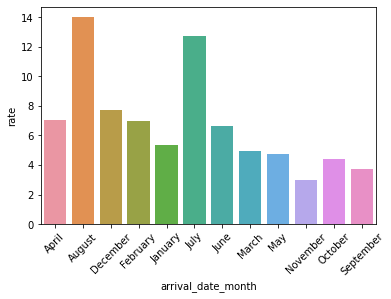

In [ ]:
temp_df = hotel_df.copy()
temp_df['has_children'] = np.where(hotel_df.children > 0, 1, 0)
grp_month = temp_df.groupby('arrival_date_month').size()
grp_month_child = temp_df.groupby(['arrival_date_month', 'has_children']).size()
out = grp_month_child * 100. / grp_month
out_df = pd.DataFrame(out, columns=['rate']).reset_index()
sns.barplot(x=out_df[out_df.has_children == 1].arrival_date_month, 
            y=out_df[out_df.has_children == 1].rate)
plt.xticks(rotation=45);

## Cancels and Dates
* Are there more cancellations on certain days?



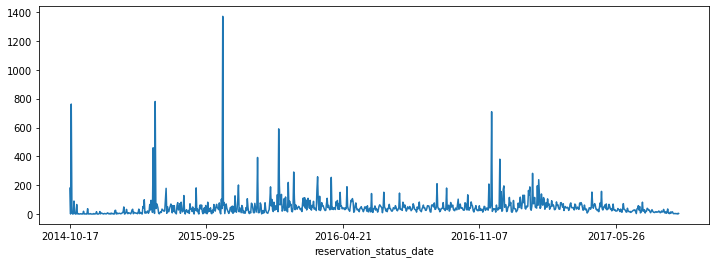

In [ ]:
out = hotel_df[hotel_df.reservation_status == 'Canceled'].groupby('reservation_status_date').size() 
out.plot(figsize=(12,4));

In [ ]:
# Top Cancellation Dates
out.sort_values(ascending=False).head(10)

reservation_status_date
2015-10-21    1371
2015-07-06     781
2015-01-01     763
2016-11-25     710
2016-01-18     591
2015-07-02     460
2015-12-18     393
2016-12-07     381
2016-02-09     292
2017-01-24     283
dtype: int64

## Advance Bookings
* Do you save or not?

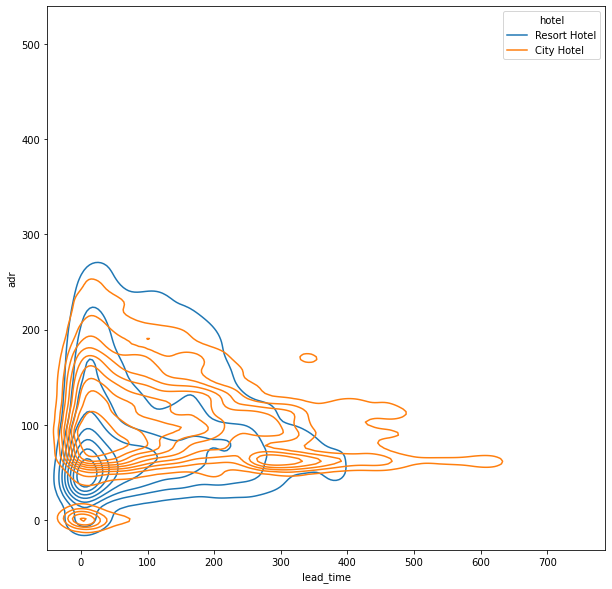

In [ ]:
# Maybe slightly negative relationship
plt.figure(figsize=(10, 10))
sns.kdeplot(x=hotel_df.lead_time, y=hotel_df.adr, hue=df.hotel);

## Cancellations
* Difference in city or resort cancellations?

In [ ]:
grp_hotel = hotel_df.groupby('hotel').size()
grp_hotel_cancel = hotel_df.groupby(['hotel', 'is_canceled']).size()
out = grp_hotel_cancel * 100. / grp_hotel
out_df = pd.DataFrame(out, columns=['rate']).reset_index()
pd.pivot(out_df, 'hotel', 'is_canceled')

rate           
is_canceled           0          1
hotel                             
City Hotel    58.273771  41.726229
Resort Hotel  72.235952  27.764048

## Waiting
* If you're forced to wait, does it make you more likey to cancel?

In [ ]:
temp_df = hotel_df.copy()
temp_df['is_waiting'] = np.where(hotel_df.days_in_waiting_list > 0, 1, 0)
grp_wait = temp_df.groupby('is_waiting').size()
grp_wait_cancel = temp_df.groupby(['is_waiting', 'is_canceled']).size()
out = grp_wait_cancel * 100. / grp_wait
out_df = pd.DataFrame(out, columns=['rate']).reset_index()
pd.pivot(out_df, 'is_waiting', 'is_canceled')

rate           
is_canceled          0          1
is_waiting                       
0            63.813640  36.186360
1            36.208761  63.791239

In [ ]:
# Waiting for a week or more
temp_df = hotel_df.copy()
temp_df['is_waiting'] = np.where(hotel_df.days_in_waiting_list > 7, 1, 0)
grp_wait = temp_df.groupby('is_waiting').size()
grp_wait_cancel = temp_df.groupby(['is_waiting', 'is_canceled']).size()
out = grp_wait_cancel * 100. / grp_wait
out_df = pd.DataFrame(out, columns=['rate']).reset_index()
pd.pivot(out_df, 'is_waiting', 'is_canceled')

rate           
is_canceled          0          1
is_waiting                       
0            63.785735  36.214265
1            36.116559  63.883441

## Deposits
* If you have a deposit, are you less likely to cancel?

In [ ]:
grp_deposit = hotel_df.groupby('deposit_type').size()
grp_deposit_cancel = hotel_df.groupby(['deposit_type', 'is_canceled']).size()
out = grp_deposit_cancel * 100. / grp_deposit
out_df = pd.DataFrame(out, columns=['rate']).reset_index()
pd.pivot(out_df, 'deposit_type', 'is_canceled')

rate           
is_canceled           0          1
deposit_type                      
No Deposit    71.622706  28.377294
Non Refund     0.637598  99.362402
Refundable    77.777778  22.222222